In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
from tqdm import tqdm
import tensorflow as tf

# Loading and preprocessing training data

In [112]:
train_dir = '/kaggle/input/egyptian-hieroglyphs/train/'
df_train = pd.read_csv(os.path.join(train_dir, '_annotations.csv'))
df_train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,nile-fish-7-_jpg.rf.31e4278980878c47a1e6a2f8dd...,640,640,Nile_Fish,375,319,512,454
1,Her-8-_jpg.rf.32bcf63f4ae4d6aea53cea5b9c0059b4...,640,640,Her,211,247,368,339
2,composite_bow-34-_jpg.rf.33153e63f7158777c50d4...,640,640,Composite_Bow,158,183,336,282
3,snake-6-_jpg.rf.32ac52ece4bcc06b1ead936693df17...,640,640,Snake,181,351,318,506
4,king-26-_jpg.rf.329a5a8e366f4fe2e3a3dca88524cc...,640,640,King,218,290,339,524


In [113]:
len(df_train)

2723

In [114]:
size= 224

resize images and display it before cropping

In [115]:
X_train = []
y_train= []

for i in tqdm(range(len(df_train))):
    image_path = os.path.join(train_dir, df_train['filename'][i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (size, size))
    X_train.append(image_resized)
    y_train.append(df_train['class'][i])

100%|██████████| 2723/2723 [00:08<00:00, 308.08it/s]


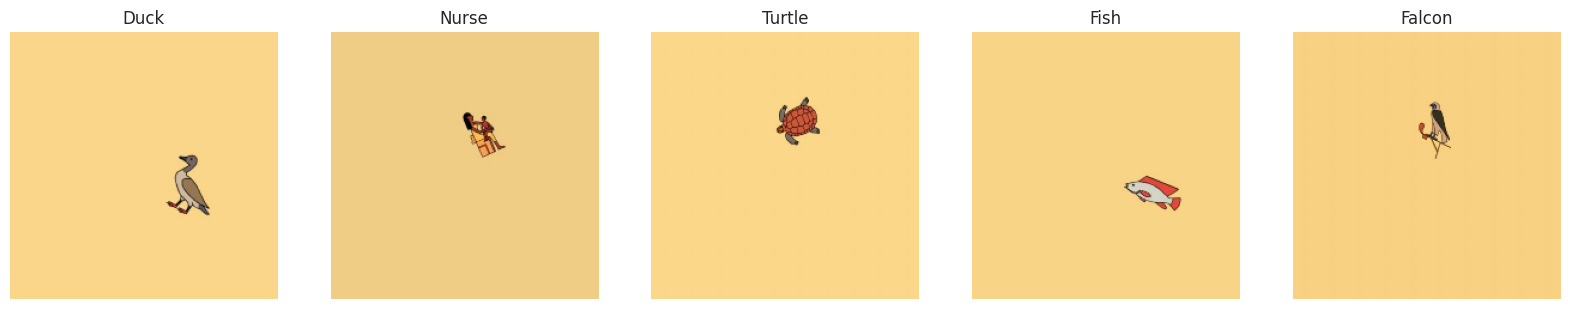

In [116]:
plt.figure(figsize=(20,20))
for n,i in enumerate(np.random.randint(0,len(df_train),5)):
    plt.subplot(1,5,n+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
# show the plot
plt.show()

Cropping train images and  plot it

In [117]:
X_train = []
y_train= []
for i in tqdm(range(len(df_train))):
    image_path = os.path.join(train_dir, df_train['filename'][i])
    image = cv2.imread(image_path)
    # cv2 use BGR so we should convert it to ==> RGB 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # To determine a part of the image "Symbols"
    x_min, y_min = df_train['xmin'][i], df_train['ymin'][i]
    x_max, y_max = df_train['xmax'][i], df_train['ymax'][i]
    image_cropped = image[y_min:y_max, x_min:x_max]
    # Resize the cropped images 224,244
    image_resized = cv2.resize(image_cropped, (size, size))
    X_train.append(image_resized)
    y_train.append(df_train['class'][i])
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 2723/2723 [00:07<00:00, 344.82it/s]


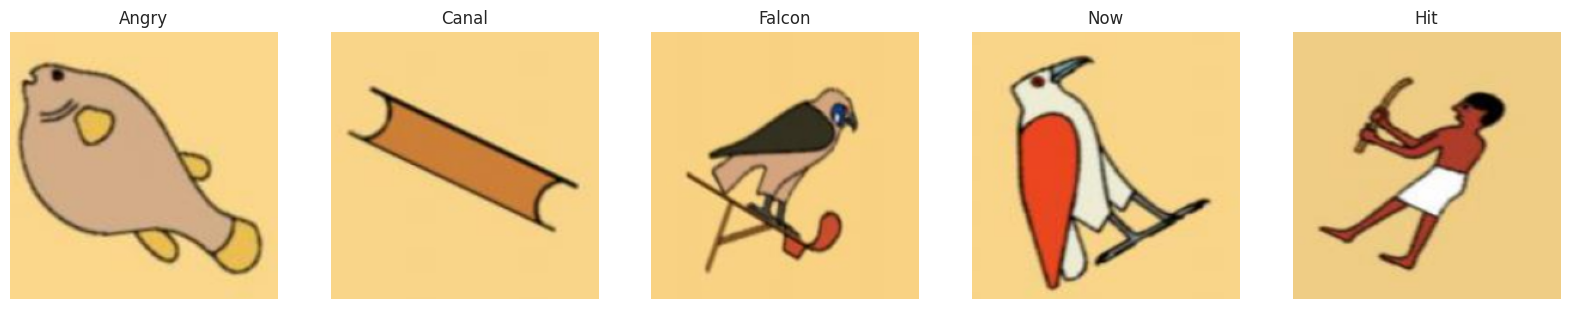

In [118]:
plt.figure(figsize=(20,20))
for n,i in enumerate(np.random.randint(0,len(df_train),5)):
    plt.subplot(1,5,n+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
# show the plot
plt.show()

# Loading and preprocessing validation data

In [119]:
valid_dir = '/kaggle/input/egyptian-hieroglyphs/valid/'
df_valid = pd.read_csv(os.path.join(valid_dir, '_annotations.csv'))
df_valid.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,hit-29-_jpg.rf.0002460aa57927fd78f439dfae18698...,640,640,Hit,204,177,355,371
1,this-21-_jpg.rf.00392809c20fae35e692ba71dcb8a5...,640,640,This,170,213,282,369
2,turtle-15-_jpg.rf.00ca6ad63e61fc66d330c698e50e...,640,640,Turtle,280,247,425,399
3,mascot-20-_jpg.rf.0100543269029e643b6351c66771...,640,640,Mascot,117,315,283,482
4,meet-26-_jpg.rf.015f393754837d733509c11522977a...,640,640,Meet,214,192,358,351


In [120]:
len(df_valid)

778

In [121]:
X_valid = []
y_valid= []


for i in tqdm(range(len(df_valid))):
    image_path = os.path.join(valid_dir, df_valid['filename'][i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x_min, y_min = df_valid['xmin'][i], df_valid['ymin'][i]
    x_max, y_max = df_valid['xmax'][i], df_valid['ymax'][i]
    image_cropped = image[y_min:y_max, x_min:x_max]

    image_resized = cv2.resize(image_cropped, (size, size))
    X_valid.append(image_resized)
    y_valid.append(df_valid['class'][i])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)


100%|██████████| 778/778 [00:02<00:00, 355.91it/s]


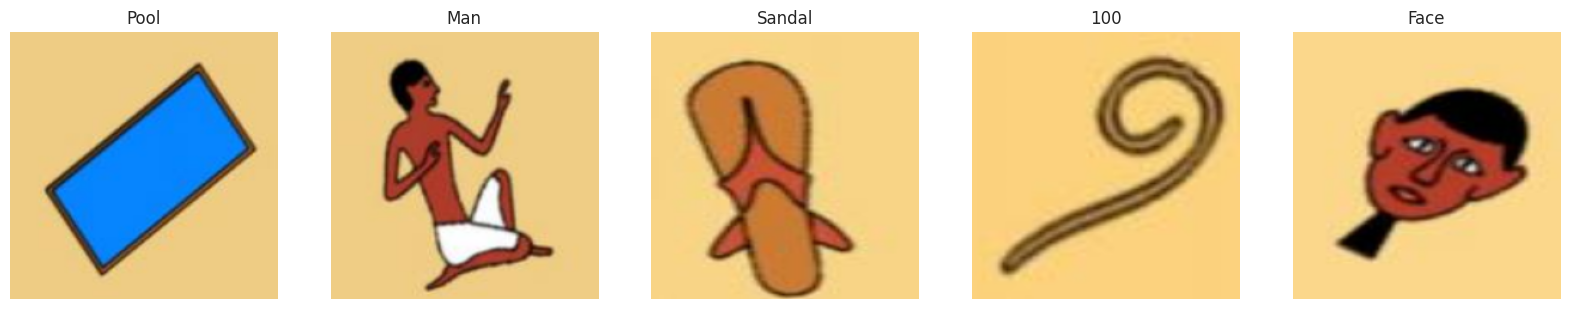

In [122]:
plt.figure(figsize=(20,20))
for n,i in enumerate(np.random.randint(0,len(df_valid),5)):
    plt.subplot(1,5,n+1)
    plt.imshow(X_valid[i])
    plt.title(y_valid[i])
    plt.axis('off')
# show the plot
plt.show()

# Loading and preprocessing testing data

In [123]:
test_dir = '/kaggle/input/egyptian-hieroglyphs/test/'
df_test = pd.read_csv(os.path.join(test_dir, '_annotations.csv'))
df_test.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,pair-13-_jpg.rf.00b5fe51fba9b40ddf2bf212cfa638...,640,640,Pair,279,252,413,361
1,papyrus-scroll-7-_jpg.rf.057bc680e540fcf9c8823...,640,640,Papyrus_Scroll,185,349,317,437
2,belongs-1-_jpg.rf.02044dee3ffba707db0388af036f...,640,640,Belongs,138,167,278,298
3,one-27-_jpg.rf.0c1b097a5ad422d790d896597e55dac...,640,640,One,401,341,451,408
4,hit-13-_jpg.rf.0919df39b6c2334496ec5ed6ed766f4...,640,640,Hit,238,115,382,337


In [124]:
len(df_test)

389

In [125]:
X_test = []
y_test= []


for i in tqdm(range(len(df_test))):
    image_path = os.path.join(test_dir, df_test['filename'][i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x_min, y_min = df_test['xmin'][i], df_test['ymin'][i]
    x_max, y_max = df_test['xmax'][i], df_test['ymax'][i]
    image_cropped = image[y_min:y_max, x_min:x_max]
    image_resized = cv2.resize(image_cropped, (size, size))
    X_test.append(image_resized)
    y_test.append(df_test['class'][i])

X_test = np.array(X_test)
y_test = np.array(y_test)


100%|██████████| 389/389 [00:01<00:00, 357.00it/s]


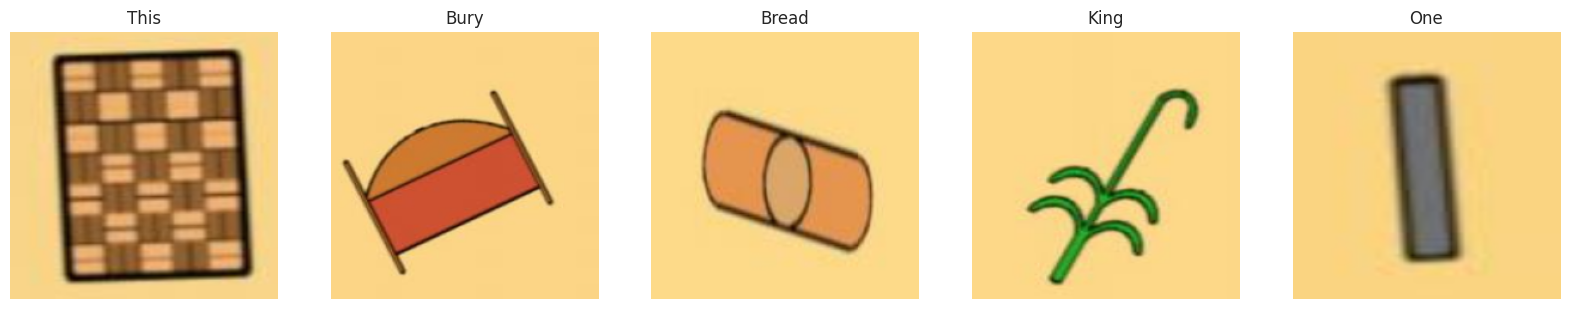

In [126]:
plt.figure(figsize=(20,20))
for n,i in enumerate(np.random.randint(0,len(df_test),5)):
    plt.subplot(1,5,n+1)
    plt.imshow(X_test[i])
    plt.title(y_test[i])
    plt.axis('off')
# show the plot
plt.show()

In [127]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).astype('float32') # ==> one hot encoder ==> 2D array so we reshape
y_valid_encoded = encoder.transform(y_valid.reshape(-1, 1)).astype('float32')
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).astype('float32') 

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [128]:
print(y_train_encoded)
print(y_valid_encoded)
print(y_test_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [129]:
models = { 
"Xception": tf.keras.applications.Xception,

"VGG16": tf.keras.applications.VGG16,

"VGG19": tf.keras.applications.VGG19,

"ResNet50": tf.keras.applications.ResNet50,

"ResNet101": tf.keras.applications.ResNet101,

"ResNet152": tf.keras.applications.ResNet152,

"InceptionV3": tf.keras.applications.InceptionV3,

"MobileNet": tf.keras.applications.MobileNet,

"MobileNetV2": tf.keras.applications.MobileNetV2,

"DenseNet121": tf.keras.applications.DenseNet121,

"DenseNet169": tf.keras.applications.DenseNet169,

"DenseNet201": tf.keras.applications.DenseNet201,

"NASNetMobile": tf.keras.applications.NASNetMobile,

"NASNetLarge": tf.keras.applications.NASNetLarge,

"EfficientNetB0": tf.keras.applications.EfficientNetB0,

"EfficientNetB1": tf.keras.applications.EfficientNetB1,

"EfficientNetB2": tf.keras.applications.EfficientNetB2,

"EfficientNetB3": tf.keras.applications.EfficientNetB3,

"EfficientNetB4": tf.keras.applications.EfficientNetB4,

"EfficientNetB5": tf.keras.applications.EfficientNetB5,

"EfficientNetB6": tf.keras.applications.EfficientNetB6,

"EfficientNetB7": tf.keras.applications.EfficientNetB7
}

In [130]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)
callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

# Evaluate models

In [131]:
final_report = []

def Evaluate_model(model, X_train, y_train, X_valid, y_valid, X_test, y_test):
    
    # Evaluate the model on training data
    model_evaluate_train = model.evaluate(X_train, y_train)
    print('Training loss:', model_evaluate_train[0])
    print('Training Accuracy:', model_evaluate_train[1])
    print('Training Precision:', model_evaluate_train[2])
    print('Training Recall:', model_evaluate_train[3])
    
    # Evaluate the model on validation data
    model_evaluate_valid = model.evaluate(X_valid, y_valid)
    print('Validation loss:', model_evaluate_valid[0])
    print('Validation Accuracy:', model_evaluate_valid[1])
    print('Validation Precision:', model_evaluate_valid[2])
    print('Validation Recall:', model_evaluate_valid[3])
    
    # Evaluate the model on test data
    model_evaluate_test = model.evaluate(X_test, y_test)
    print('Test loss:', model_evaluate_test[0])
    print('Test Accuracy:', model_evaluate_test[1])
    print('Test Precision:', model_evaluate_test[2])
    print('Test Recall:', model_evaluate_test[3])
    
    # Return rounded metrics
    return (np.round(model_evaluate_train[0], 2), np.round(model_evaluate_test[0], 2),
            np.round(model_evaluate_train[1], 2), np.round(model_evaluate_test[1], 2),
            np.round(model_evaluate_train[2], 2), np.round(model_evaluate_test[2], 2),
            np.round(model_evaluate_train[3], 2), np.round(model_evaluate_test[3], 2))


# VGG19 Model

In [132]:
# Define input shape
input_shape = (224, 224, 3)  # Adjust height, width, and channels as needed


# Define inputs
inputs = tf.keras.Input(shape=input_shape)
print(inputs )
model_name='VGG19'
# Load the base model
base_model = models[model_name](include_top=False, weights='imagenet', input_tensor=inputs)
# Freeze the base model layers
base_model.trainable = False

#x = tf.keras.layers.Flatten()(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(95, activation='softmax')(x)

# Create model
vgg_model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

vgg_model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy",'precision','recall'])


# Display summary
vgg_model.summary()


<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_1748>


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,179,615 (76.98 MB)

 Trainable params: 154,591 (603.87 KB)

 Non-trainable params: 20,025,024 (76.39 MB)

# Training VGG19 Model

In [133]:
# Train the model
VGG19 = vgg_model.fit(X_train, y_train_encoded, epochs=20,
                    validation_data=(X_valid, y_valid_encoded),
                    batch_size=16, callbacks=callbacks)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 28s 127ms/step - accuracy: 0.0842 - loss: 4.3827 - precision: 0.4551 - recall: 0.0041 - val_accuracy: 0.8201 - val_loss: 1.8984 - val_precision: 0.9804 - val_recall: 0.1285 - learning_rate: 0.0010
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.4727 - loss: 2.4218 - precision: 0.9446 - recall: 0.0653 - val_accuracy: 0.9447 - val_loss: 0.8957 - val_precision: 0.9943 - val_recall: 0.4473 - learning_rate: 0.0010
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.6949 - loss: 1.5856 - precision: 0.9645 - recall: 0.2407 - val_accuracy: 0.9550 - val_loss: 0.4119 - val_precision: 0.9789 - val_recall: 0.8355 - learning_rate: 0.0010
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.8156 - loss: 1.0414 - precision: 0.9570 - recall: 0.4479 - val_accuracy: 0.9640 - val_loss: 0.2138 - val_precision: 0.9729 - val_recall: 0.9216 - learning_rate: 0.0010
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step -

In [134]:
final_report.append(Evaluate_model(vgg_model, X_train, y_train_encoded, X_valid, y_valid_encoded, X_test, y_test_encoded))

86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.9761 - loss: 0.0413 - precision: 0.9761 - recall: 0.9761
Training loss: 0.03776240348815918
Training Accuracy: 0.9790672063827515
Training Precision: 0.9790672063827515
Training Recall: 0.9790672063827515
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9725 - loss: 0.0499 - precision: 0.9725 - recall: 0.9725
Validation loss: 0.05197712406516075
Validation Accuracy: 0.9691516757011414
Validation Precision: 0.9691516757011414
Validation Recall: 0.9691516757011414
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.9652 - loss: 0.0539 - precision: 0.9652 - recall: 0.9652
Test loss: 0.04633835703134537
Test Accuracy: 0.9691516757011414
Test Precision: 0.9691516757011414
Test Recall: 0.9691516757011414


In [135]:
#plotting training values
import seaborn as sns
sns.set()

acc = VGG19.history['accuracy']
val_acc = VGG19.history['val_accuracy']

precision = VGG19.history['precision']
val_precision = VGG19.history['val_precision']

recall =VGG19.history['recall']
val_recall =VGG19.history['val_recall']

loss = VGG19.history['loss']
val_loss = VGG19.history['val_loss']

epochs = range(1, len(loss) + 1)

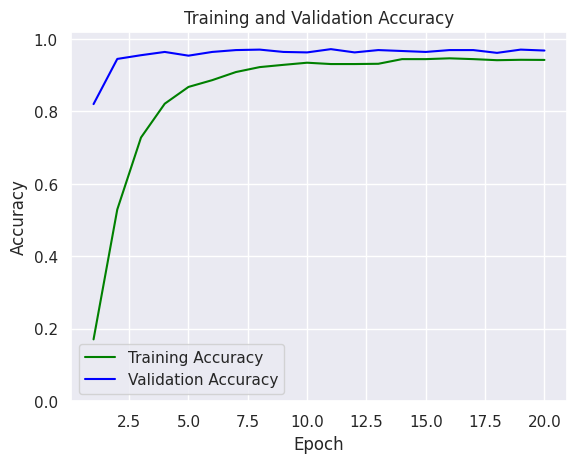

In [136]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()

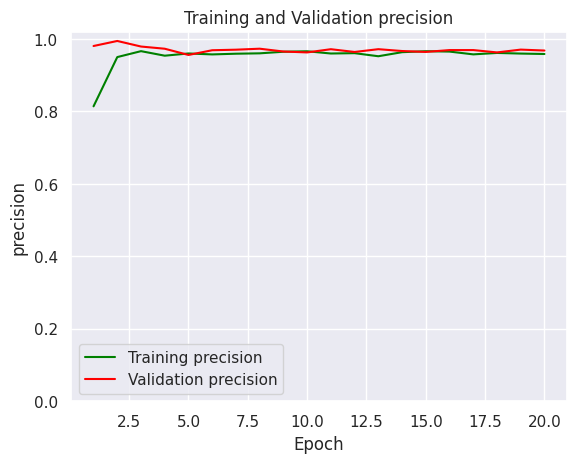

In [137]:
plt.figure()
#loss plot
plt.plot(epochs, precision, color='green', label='Training precision')
plt.plot(epochs, val_precision, color='red', label='Validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.legend()
plt.ylim(0,1.02)
plt.show()

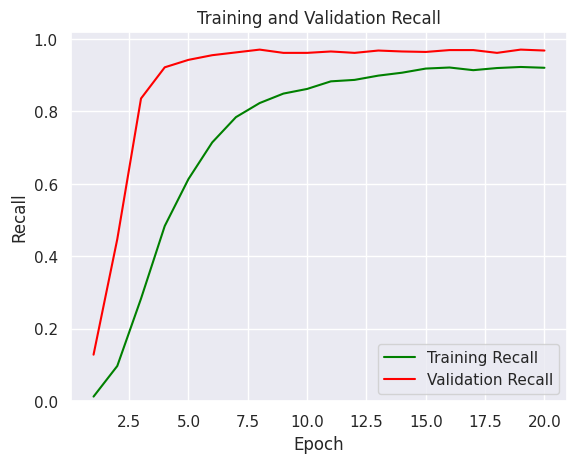

In [138]:
plt.figure()
#loss plot
plt.plot(epochs, recall, color='green', label='Training Recall')
plt.plot(epochs, val_recall, color='red', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.ylim(0,1.02)
plt.show()

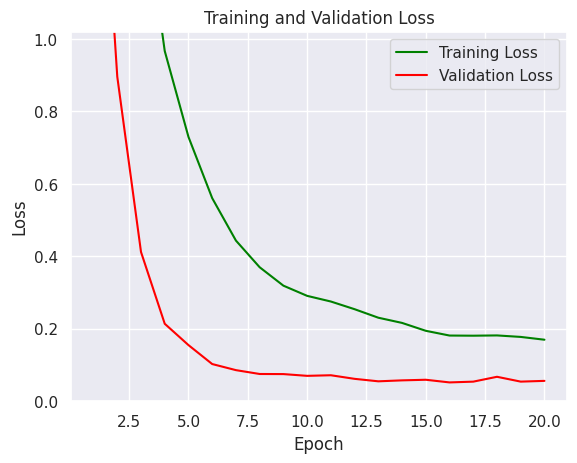

In [139]:
plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1.02)
plt.show()

# Predict after using VGG

In [140]:
def predict_with_test_set(model, X_test, y_test, class_names):
    fig, axes = plt.subplots(1, 3, figsize=(15, 55))  # Adjusted for better visualization
    axes = axes.ravel()  # Flatten axes for easy indexing

    for index in range(min(len(X_test), 3)):  # Limiting to 33 images for visualization
        img = X_test[index]
        
        # Make predictions
        prediction = np.argmax(model.predict(img.reshape(1, 224, 224, 3), verbose=0), axis=-1)[0]
        
        # Extract actual class from y_test
        actual = np.argmax(y_test[index])

        # Display the image
        axes[index].imshow(img)
        
        # Set title of the plot showing actual and predicted labels
        axes[index].set_title(f"Actual: {class_names[actual]}\nPredict: {class_names[prediction]}")
        
        # Optional: Turn off axes for cleaner visualization
        axes[index].axis('off')

    plt.tight_layout()
    plt.show()


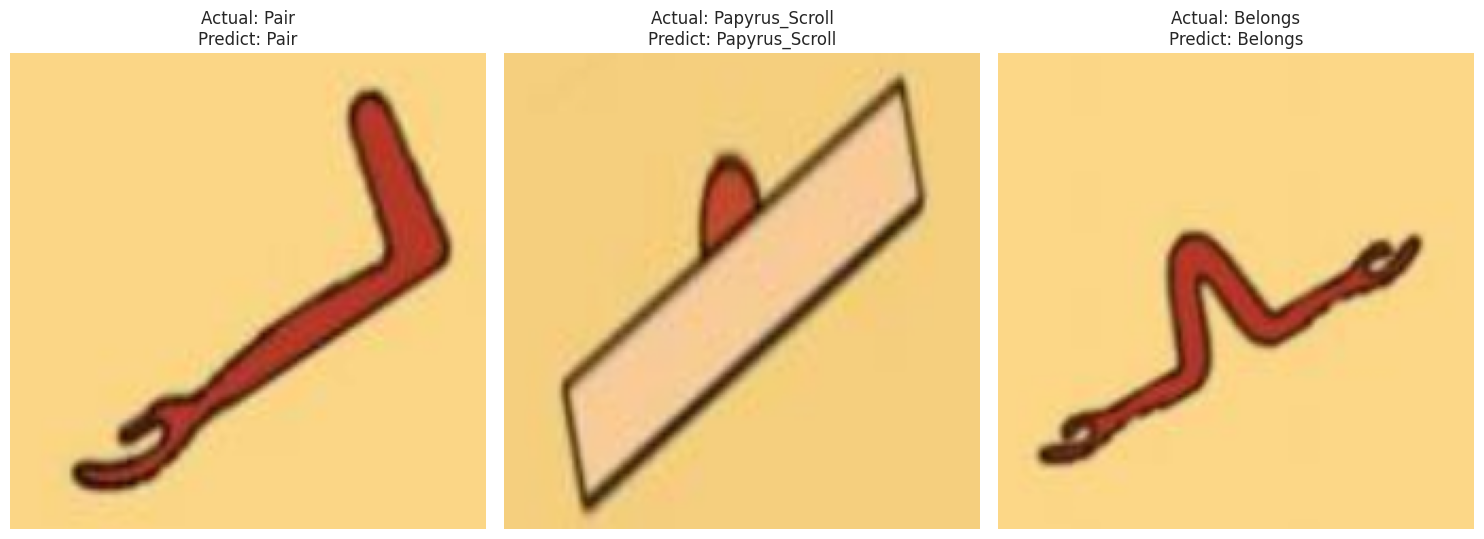

In [141]:
predict_with_test_set(vgg_model, X_test, y_test_encoded, encoder.categories_[0]) 

# ResNet101

In [142]:
# Define input shape
input_shape = (224, 224, 3)  # Adjust height, width, and channels as needed


# Define inputs
inputs = tf.keras.Input(shape=input_shape)
print(inputs )
model_name='ResNet101'
# Load the base model
base_model = models[model_name](include_top=False, weights='imagenet', input_tensor=inputs)
# Freeze the base model layers
base_model.trainable = False

#x = tf.keras.layers.Flatten()(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(95, activation='softmax')(x)

# Create model
ResNet101_model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

ResNet101_model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy",'precision','recall'])


# Display summary
ResNet101_model.summary()


<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_1778>


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_9[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 43,206,623 (164.82 MB)

 Trainable params: 547,807 (2.09 MB)

 Non-trainable params: 42,658,816 (162.73 MB)

# Training ResNet101

In [143]:
# Train the model
ResNet101 = ResNet101_model.fit(X_train, y_train_encoded, epochs=20,
                    validation_data=(X_valid, y_valid_encoded),
                    batch_size=16,callbacks=callbacks)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 53s 182ms/step - accuracy: 0.1397 - loss: 3.9999 - precision: 0.6909 - recall: 0.0108 - val_accuracy: 0.8959 - val_loss: 1.5279 - val_precision: 1.0000 - val_recall: 0.2301
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.6013 - loss: 2.0119 - precision: 0.9658 - recall: 0.1233 - val_accuracy: 0.9524 - val_loss: 0.5589 - val_precision: 1.0000 - val_recall: 0.7095
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.7920 - loss: 1.2070 - precision: 0.9626 - recall: 0.3527 - val_accuracy: 0.9589 - val_loss: 0.2331 - val_precision: 0.9792 - val_recall: 0.9087
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8558 - loss: 0.8217 - precision: 0.9688 - recall: 0.5620 - val_accuracy: 0.9627 - val_loss: 0.1212 - val_precision: 0.9663 - val_recall: 0.9576
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.8912 - loss: 0.5753 - precision: 0.9676 - recall: 0.7164 - val_accuracy: 0.9743 - 

In [144]:
final_report.append(Evaluate_model(ResNet101_model, X_train, y_train_encoded, X_valid, y_valid_encoded, X_test, y_test_encoded))

86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.9806 - loss: 0.0397 - precision: 0.9806 - recall: 0.9806
Training loss: 0.036713965237140656
Training Accuracy: 0.9816378951072693
Training Precision: 0.9816378951072693
Training Recall: 0.9816378951072693
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9783 - loss: 0.0484 - precision: 0.9783 - recall: 0.9783
Validation loss: 0.05210708826780319
Validation Accuracy: 0.9730077385902405
Validation Precision: 0.9730077385902405
Validation Recall: 0.9730077385902405
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.9599 - loss: 0.0508 - precision: 0.9608 - recall: 0.9599
Test loss: 0.04638231545686722
Test Accuracy: 0.9640102982521057
Test Precision: 0.9664948582649231
Test Recall: 0.9640102982521057


In [145]:
#plotting training values
import seaborn as sns
sns.set()

acc = ResNet101.history['accuracy']
val_acc = ResNet101.history['val_accuracy']

precision = ResNet101.history['precision']
val_precision = ResNet101.history['val_precision']

recall =ResNet101.history['recall']
val_recall =ResNet101.history['val_recall']

loss = ResNet101.history['loss']
val_loss = ResNet101.history['val_loss']

epochs = range(1, len(loss) + 1)

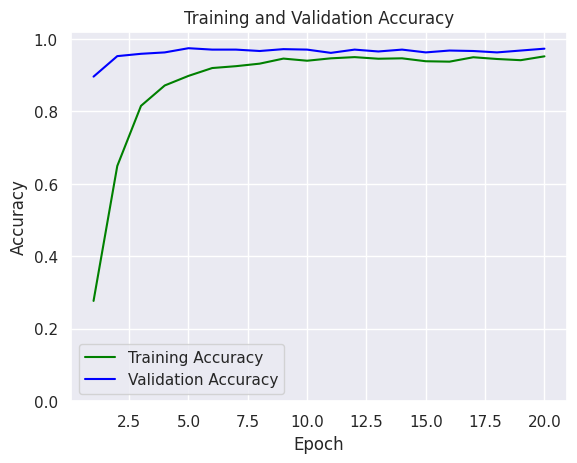

In [146]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()

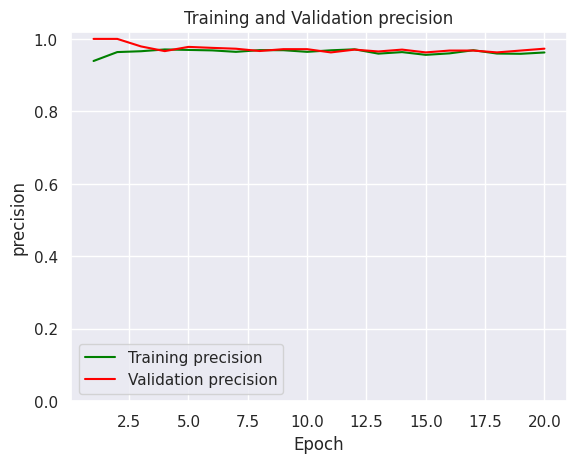

In [147]:
plt.figure()
#loss plot
plt.plot(epochs, precision, color='green', label='Training precision')
plt.plot(epochs, val_precision, color='red', label='Validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.legend()
plt.ylim(0,1.02)
plt.show()

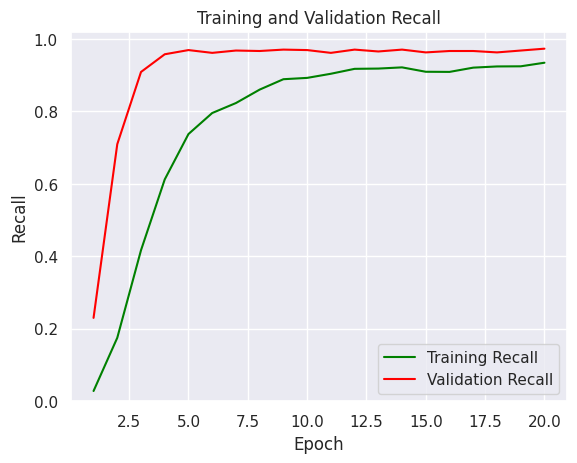

In [148]:
plt.figure()
#loss plot
plt.plot(epochs, recall, color='green', label='Training Recall')
plt.plot(epochs, val_recall, color='red', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.ylim(0,1.02)
plt.show()

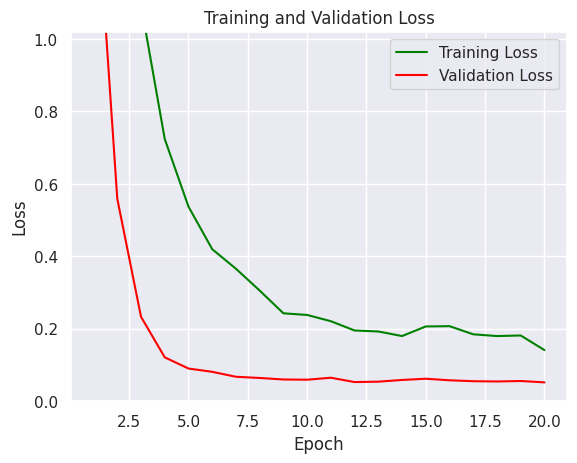

In [149]:
plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1.02)
plt.show()

# Predict after using ResNet101

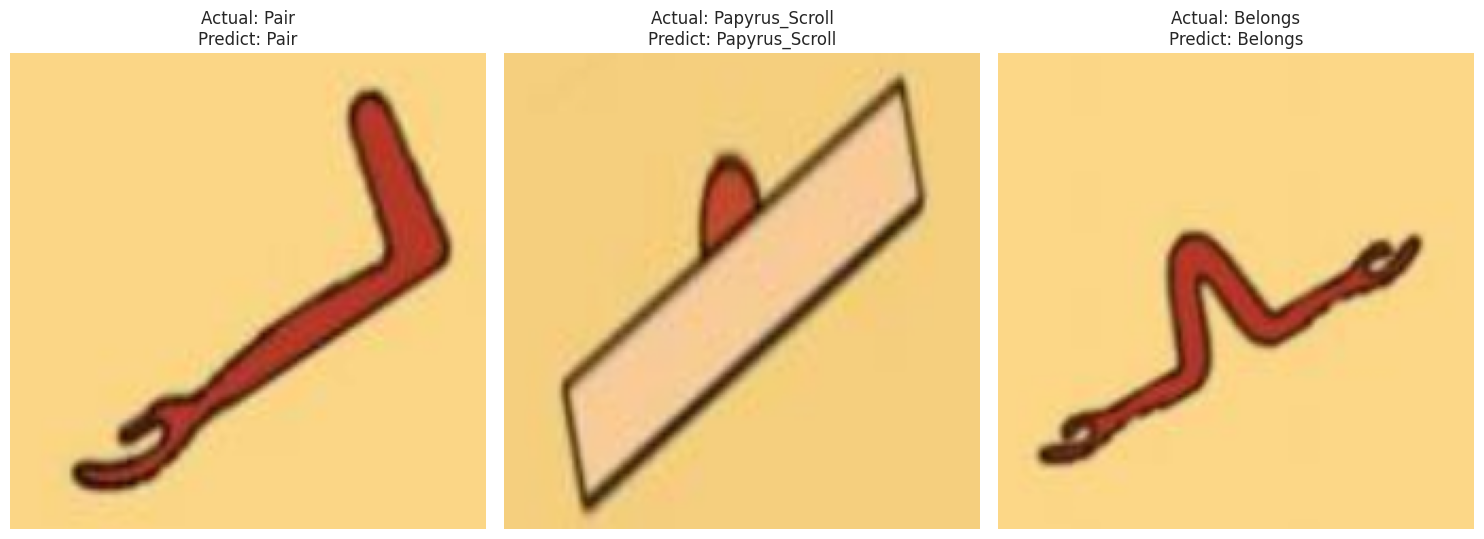

In [150]:
predict_with_test_set(ResNet101_model, X_test, y_test_encoded, encoder.categories_[0])  # Make sure y_test is one-hot encoded if needed

# DenseNet121 model

In [151]:
# Define input shape
input_shape = (224, 224, 3)  # Adjust height, width, and channels as needed


# Define inputs
inputs = tf.keras.Input(shape=input_shape)
print(inputs )
model_name='DenseNet121'
# Load the base model
base_model = models[model_name](include_top=False, weights='imagenet', input_tensor=inputs)
# Freeze the base model layers
base_model.trainable = False

#x = tf.keras.layers.Flatten()(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(95, activation='softmax')(x)

# Create model
DenseNet121_model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

DenseNet121_model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy",'precision','recall'])


# Display summary
DenseNet121_model.summary()

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_2131>


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_10[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,323,807 (27.94 MB)

 Trainable params: 285,663 (1.09 MB)

 Non-trainable params: 7,038,144 (26.85 MB)

# Training DenseNet121

In [152]:
# Train the model
DenseNet121 = DenseNet121_model.fit(X_train, y_train_encoded, epochs=20,
                    validation_data=(X_valid, y_valid_encoded),
                    batch_size=16)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 51s 167ms/step - accuracy: 0.0408 - loss: 4.6975 - precision: 0.1543 - recall: 0.0014 - val_accuracy: 0.1902 - val_loss: 3.5142 - val_precision: 0.9767 - val_recall: 0.0540
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.1744 - loss: 3.4150 - precision: 0.7851 - recall: 0.0184 - val_accuracy: 0.3766 - val_loss: 2.6465 - val_precision: 0.9265 - val_recall: 0.0810
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.3236 - loss: 2.7592 - precision: 0.7138 - recall: 0.0341 - val_accuracy: 0.5861 - val_loss: 1.9870 - val_precision: 0.9496 - val_recall: 0.1452
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.4130 - loss: 2.3218 - precision: 0.8232 - recall: 0.0923 - val_accuracy: 0.7558 - val_loss: 1.4438 - val_precision: 0.9692 - val_recall: 0.2429
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.5185 - loss: 1.8857 - precision: 0.8945 - recall: 0.1785 - val_accuracy: 0.7738 - val_l

In [153]:
final_report.append(Evaluate_model(DenseNet121_model, X_train, y_train_encoded, X_valid, y_valid_encoded, X_test, y_test_encoded))

86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.9504 - loss: 0.2122 - precision: 0.9687 - recall: 0.9056
Training loss: 0.20521371066570282
Training Accuracy: 0.9529930353164673
Training Precision: 0.9710144996643066
Training Recall: 0.9103929400444031
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9269 - loss: 0.2731 - precision: 0.9598 - recall: 0.8749
Validation loss: 0.2643289864063263
Validation Accuracy: 0.9318765997886658
Validation Precision: 0.9579242467880249
Validation Recall: 0.877892017364502
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.9203 - loss: 0.2865 - precision: 0.9642 - recall: 0.8673
Test loss: 0.28859594464302063
Test Accuracy: 0.9280205368995667
Test Precision: 0.9713466763496399
Test Recall: 0.8714653253555298


# Plotting DenseNet121

In [154]:
#plotting training values
import seaborn as sns
sns.set()

acc = DenseNet121.history['accuracy']
val_acc = DenseNet121.history['val_accuracy']

precision = DenseNet121.history['precision']
val_precision = DenseNet121.history['val_precision']

recall =DenseNet121.history['recall']
val_recall =DenseNet121.history['val_recall']

loss = DenseNet121.history['loss']
val_loss = DenseNet121.history['val_loss']

epochs = range(1, len(loss) + 1)

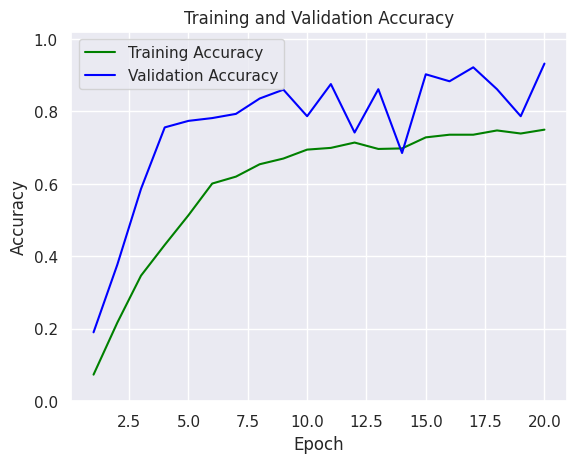

In [155]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()

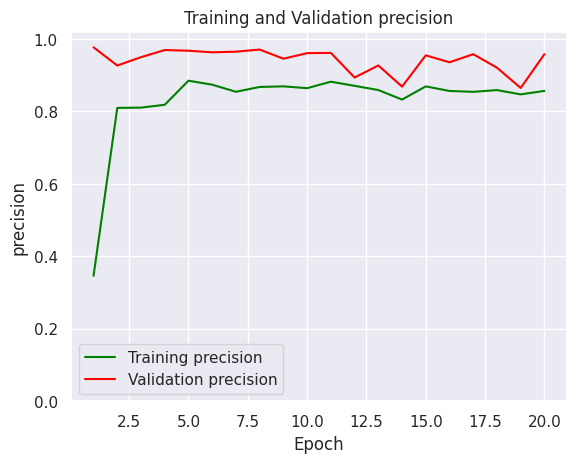

In [156]:
plt.figure()
#loss plot
plt.plot(epochs, precision, color='green', label='Training precision')
plt.plot(epochs, val_precision, color='red', label='Validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epoch')
plt.ylabel('precision')
plt.legend()
plt.ylim(0,1.02)
plt.show()

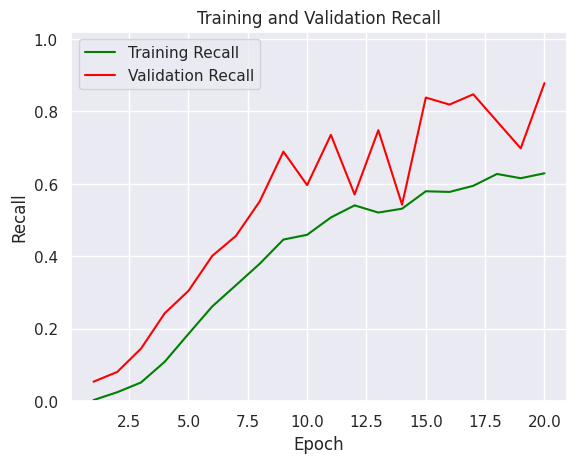

In [157]:
plt.figure()
#loss plot
plt.plot(epochs, recall, color='green', label='Training Recall')
plt.plot(epochs, val_recall, color='red', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.ylim(0,1.02)
plt.show()

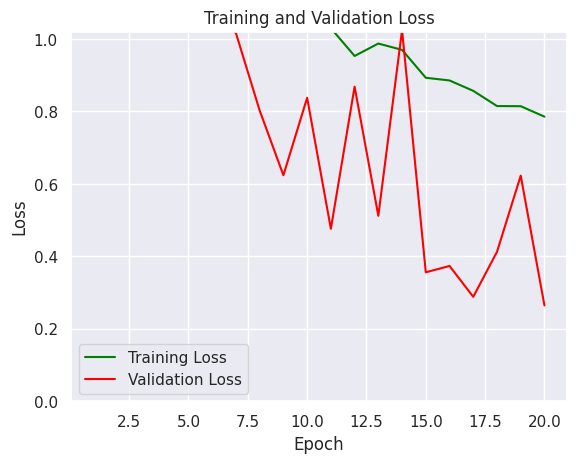

In [158]:
plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1.02)
plt.show()

# Predict after using DenseNet121

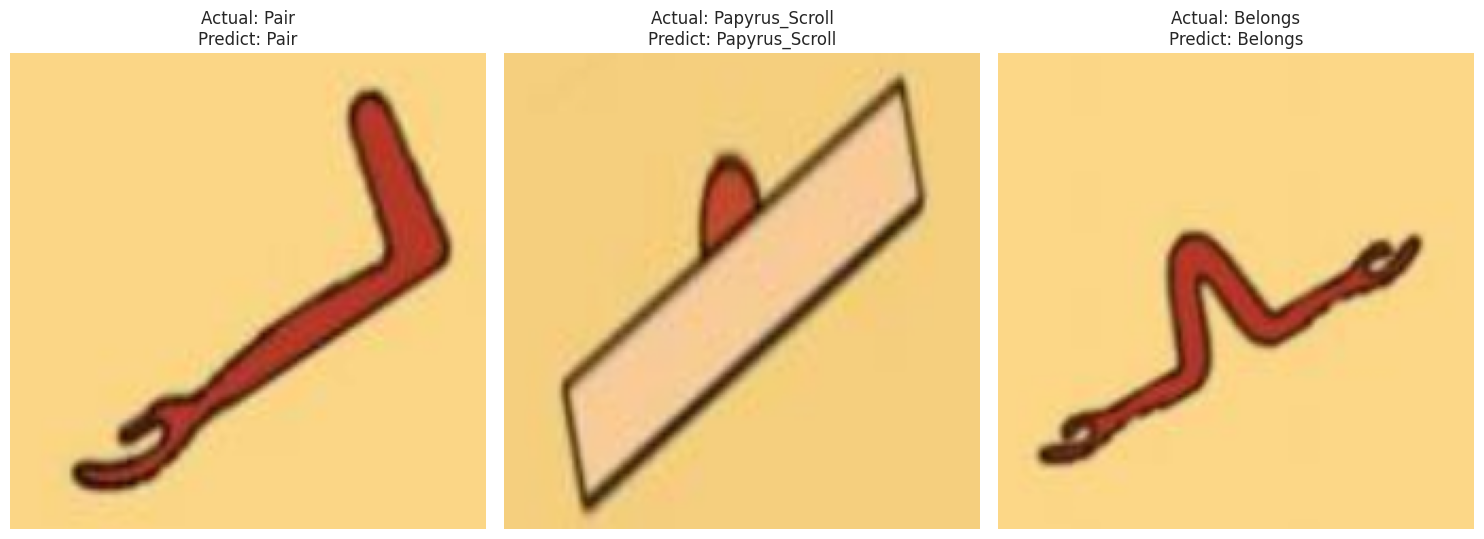

In [159]:
predict_with_test_set(DenseNet121_model, X_test, y_test_encoded, encoder.categories_[0])  # Make sure y_test is one-hot encoded if needed

# CNN Model

In [160]:
from tensorflow import keras
cnn_model = keras.models.Sequential()

cnn_model.add(keras.layers.Conv2D(filters=64, kernel_size=7, strides=1, 
                padding="same", activation=keras.layers.LeakyReLU(alpha=0.02), name="Conv1", input_shape= (224,224,3)))
cnn_model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
cnn_model.add(keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, 
                padding="same", activation=keras.layers.LeakyReLU(alpha=0.02), name="Conv2"))
cnn_model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
cnn_model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, 
                padding="same", activation=keras.layers.LeakyReLU(alpha=0.02), name="Conv3"))
cnn_model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

cnn_model.add(keras.layers.Flatten(name="Flatten1"))
cnn_model.add(keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.02), name="Dense1"))
cnn_model.add(keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.02), name="Dense2"))
cnn_model.add(keras.layers.Dense(95, activation="softmax", name="Output"))

# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999)

cnn_model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy",'precision','recall'])

print(cnn_model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 224, 224, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 112, 128)  │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 95)             │         6,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,214,239 (100.00 MB)

 Trainable params: 26,214,239 (100.00 MB)

 Non-trainable params: 0 (0.00 B)

None


In [161]:
# Train the model
CNN = cnn_model.fit(X_train, y_train_encoded, epochs=20,
                    validation_data=(X_valid, y_valid_encoded),
                    batch_size=16)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.0163 - loss: 62.3371 - precision: 0.0242 - recall: 0.0056 - val_accuracy: 0.0180 - val_loss: 4.4924 - val_precision: 1.0000 - val_recall: 0.0154
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.0337 - loss: 4.4857 - precision: 0.9417 - recall: 0.0116 - val_accuracy: 0.0656 - val_loss: 4.2366 - val_precision: 0.7073 - val_recall: 0.0373
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.1008 - loss: 4.1149 - precision: 0.8036 - recall: 0.0445 - val_accuracy: 0.1671 - val_loss: 3.6689 - val_precision: 0.8205 - val_recall: 0.0823
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.2237 - loss: 3.3704 - precision: 0.8074 - recall: 0.1036 - val_accuracy: 0.3458 - val_loss: 2.6781 - val_precision: 0.8756 - val_recall: 0.2172
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.4815 - loss: 2.0820 - precision: 0.8685 - recall: 0.3185 - val_accuracy: 0.5283 - v

In [162]:
final_report.append(Evaluate_model(cnn_model, X_train, y_train_encoded, X_valid, y_valid_encoded, X_test, y_test_encoded))

86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9399 - loss: 0.2747 - precision: 0.9477 - recall: 0.9339
Training loss: 0.2659233510494232
Training Accuracy: 0.9397723078727722
Training Precision: 0.9470149278640747
Training Recall: 0.9320602416992188
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6945 - loss: 2.1362 - precision: 0.7415 - recall: 0.6699
Validation loss: 2.233534097671509
Validation Accuracy: 0.6812339425086975
Validation Precision: 0.7252124547958374
Validation Recall: 0.6580976843833923
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6492 - loss: 2.6480 - precision: 0.6939 - recall: 0.6422
Test loss: 2.577302932739258
Test Accuracy: 0.6503856182098389
Test Precision: 0.6938202381134033
Test Recall: 0.6349614262580872


# Table using DataFrame

In [163]:
model_name=['VGG19','ResNet101','DenseNet121','CNN']

model_accuracy=pd.DataFrame(final_report,index=model_name,columns=['Train Loss','Test Loss','Train Accuracy','Test Accuracy'
                                                                  ,'Train Precision','Test Precision','Train Recall','Test Recall'])

In [164]:
model_accuracy.head()

,Train Loss,Test Loss,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall
VGG19,0.04,0.05,0.98,0.97,0.98,0.97,0.98,0.97
ResNet101,0.04,0.05,0.98,0.96,0.98,0.97,0.98,0.96
DenseNet121,0.21,0.29,0.95,0.93,0.97,0.97,0.91,0.87
CNN,0.27,2.58,0.94,0.65,0.95,0.69,0.93,0.63
